### 'Action Taken'

En este Notebook haremos el análisis considerando como objetivo a predecir la columna *'Action Taken'*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv("02_clean_cybersecurity_attacks.csv")
df = pd.read_csv("03_codif_cybersecurity_attacks.csv")
pd.options.display.max_columns = None

In [3]:
df_clean

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Firewall Logs,Log Source,Trimestre,Localidad,Region
0,31225,17616,ICMP,503,Data,HTTP,Log Data,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0,Segment A,Log Data,Server,2,Jamshedpur,Sikkim
1,17245,48166,ICMP,1174,Data,HTTP,Log Data,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0,Segment B,Log Data,Firewall,3,Bilaspur,Nagaland
2,16811,53600,UDP,306,Control,HTTP,Log Data,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0,Segment C,Log Data,Firewall,4,Bokaro,Rajasthan
3,20018,32534,UDP,385,Data,HTTP,IoC No Detected,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0,Segment B,No Log Data,Firewall,3,Jaunpur,Rajasthan
4,6131,26646,TCP,1462,Data,DNS,IoC No Detected,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0,Segment C,No Log Data,Firewall,3,Anantapur,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,UDP,1428,Control,HTTP,Log Data,39.28,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0,Segment A,Log Data,Firewall,2,Nashik,Manipur
39996,2553,28091,UDP,1184,Control,HTTP,Log Data,27.25,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0,Segment C,Log Data,Firewall,1,Vadodara,Mizoram
39997,22505,25152,UDP,1043,Data,DNS,Log Data,31.01,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0,Segment C,Log Data,Server,1,Mahbubnagar,Himachal Pradesh
39998,20013,2703,UDP,483,Data,FTP,Log Data,97.85,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0,Segment B,Log Data,Server,3,Rourkela,Arunachal Pradesh


In [4]:
df

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Firewall Logs,Log Source,Trimestre,Localidad,Region
0,14137,7709,0,439,1,2,1,2827,2,1,2,1,22830,0,0,0,1,1,134,21
1,7587,21888,0,1110,1,2,1,5070,2,0,0,1,27434,0,1,0,0,2,60,17
2,7388,24463,2,242,0,2,1,8595,0,1,1,1,10139,0,2,0,0,3,61,20
3,8913,14681,2,321,1,2,0,1556,2,1,0,2,9216,0,1,1,0,2,135,20
4,2365,11942,1,1398,1,0,0,50,0,1,0,1,6462,0,2,1,0,2,20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,14033,2665,2,1364,0,2,1,3870,0,0,2,2,1322,0,0,0,0,1,210,14
39996,731,12634,2,1120,0,2,1,2687,0,0,2,0,22352,0,2,0,0,0,307,16
39997,10087,11250,2,979,1,0,1,3058,0,1,0,1,25221,0,2,0,1,0,178,8
39998,8909,774,2,419,1,1,1,9613,2,1,1,1,22186,0,1,0,1,2,252,1


In [5]:
# calculamos feature_importances con el módulo RandomForestClassifier, destacaremos las columnas con importancia menor al 20%.
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Action Taken', axis=1)
y = df['Action Taken']

feature_rf = RandomForestClassifier()
feature_rf.fit(X, y)
column_names = [
    'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
    'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Attack Type',
    'Attack Signature', 'Action Taken', 'Severity Level', 'User Information',
    'Device Information', 'Network Segment', 'Firewall Logs', 'Log Source',
    'Trimestre', 'Localidad', 'Region'
]
importances = feature_rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [column_names[i] for i in indices]

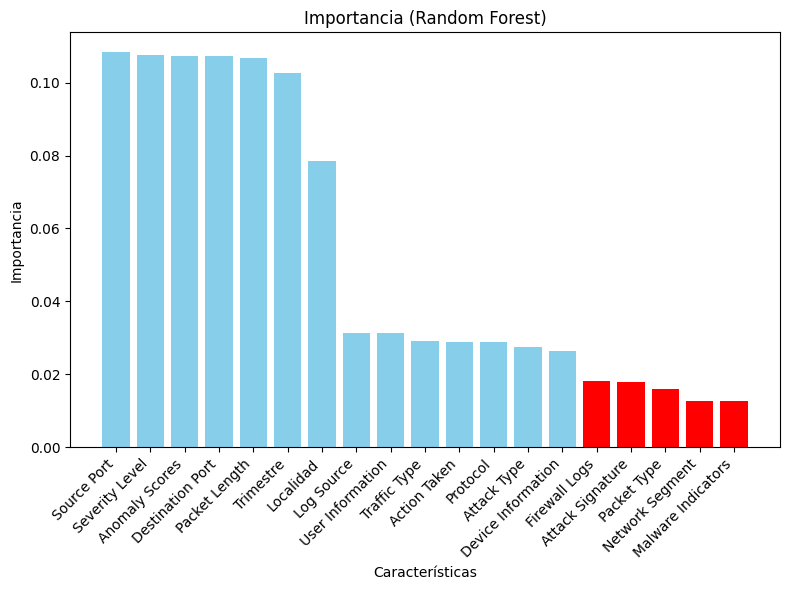

In [6]:
colors = ['red' if imp < 0.02 else 'skyblue' for imp in sorted_importances]
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color= colors)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia (Random Forest)")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [7]:
# graficaremos en el diagrama de heatmap la correlación entre columnas, nos ayudará a determinar si es necesario prescindir de más columnas.
import seaborn as sns
corr = np.abs(df.drop(['Action Taken'], axis=1).corr())

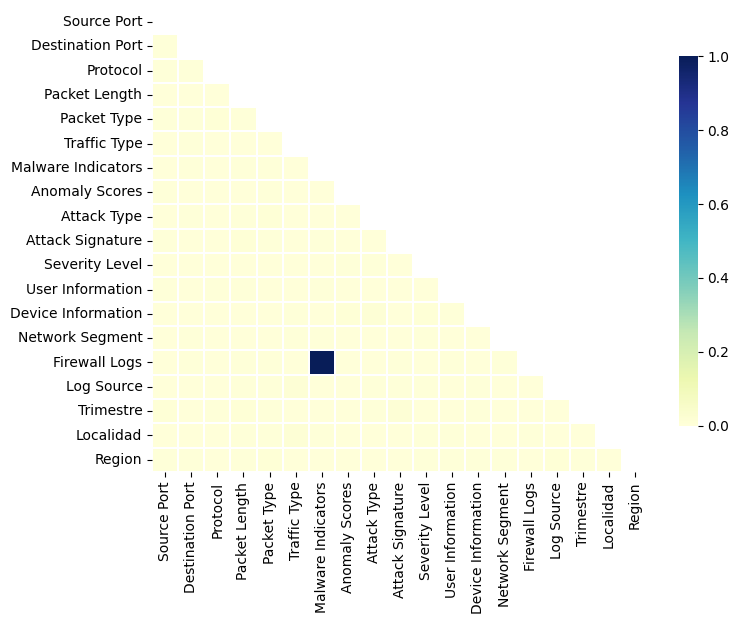

In [8]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

In [9]:
# descartaremos las columnas con bajo feature_importances_ y alta correlación según los resultados obtenidos.
df = df.drop(['Network Segment','Malware Indicators','Packet Type','Firewall Logs','Attack Signature'], axis=1)

In [10]:
df

,Source Port,Destination Port,Protocol,Packet Length,Traffic Type,Anomaly Scores,Attack Type,Action Taken,Severity Level,User Information,Device Information,Log Source,Trimestre,Localidad,Region
0,14137,7709,0,439,2,2827,2,2,1,22830,0,1,1,134,21
1,7587,21888,0,1110,2,5070,2,0,1,27434,0,0,2,60,17
2,7388,24463,2,242,2,8595,0,1,1,10139,0,0,3,61,20
3,8913,14681,2,321,2,1556,2,0,2,9216,0,0,2,135,20
4,2365,11942,1,1398,0,50,0,0,1,6462,0,0,2,20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,14033,2665,2,1364,2,3870,0,2,2,1322,0,0,1,210,14
39996,731,12634,2,1120,2,2687,0,2,0,22352,0,0,0,307,16
39997,10087,11250,2,979,0,3058,0,0,1,25221,0,1,0,178,8
39998,8909,774,2,419,1,9613,2,1,1,22186,0,1,2,252,1


In [11]:
# haremos un conteo de nuestro objetivo a predecir para valor si disponemos de datos balanceados.
df['Action Taken'].value_counts()

Action Taken
0    13529
1    13276
2    13195
Name: count, dtype: int64

In [12]:
# utilizamos el módulo 'train_test_split' para dividir nuestra muestra en dos conjuntos de datos 'train y test' 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['Action Taken'], random_state=42)

print("(filas,columas) train:",train.shape)
print("(filas,columas) test:",test.shape)

(filas,columas) train: (32000, 15)
(filas,columas) test: (8000, 15)


In [13]:
# escalamos los datos con el módulo 'StandardScaler' para lograr eficiencia y evitar error en los modelos de entrenamiento.
from sklearn.preprocessing import StandardScaler

X_train = train.drop('Action Taken', axis=1)
y_train = train['Action Taken']

X_test = test.drop('Action Taken', axis=1)
y_test = test['Action Taken']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

ENTRENAMOS LOS MODELOS.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

### RandomForestClassifier

In [15]:
# entrenamos el modelo
rf = RandomForestClassifier(max_depth=None, random_state=42).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
rf_y_pred = rf.predict(Xs_train)
report_rf = classification_report(y_train, rf_y_pred)
rf_acc = accuracy_score(y_train, rf_y_pred)
rf_confmat = confusion_matrix(y_train, rf_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
rf_y_pred_test = rf.predict(Xs_test)
report_rf_test = classification_report(y_test, rf_y_pred_test)
rf_acc_test = accuracy_score(y_test, rf_y_pred_test)
rf_confmat_test = confusion_matrix(y_test, rf_y_pred_test)

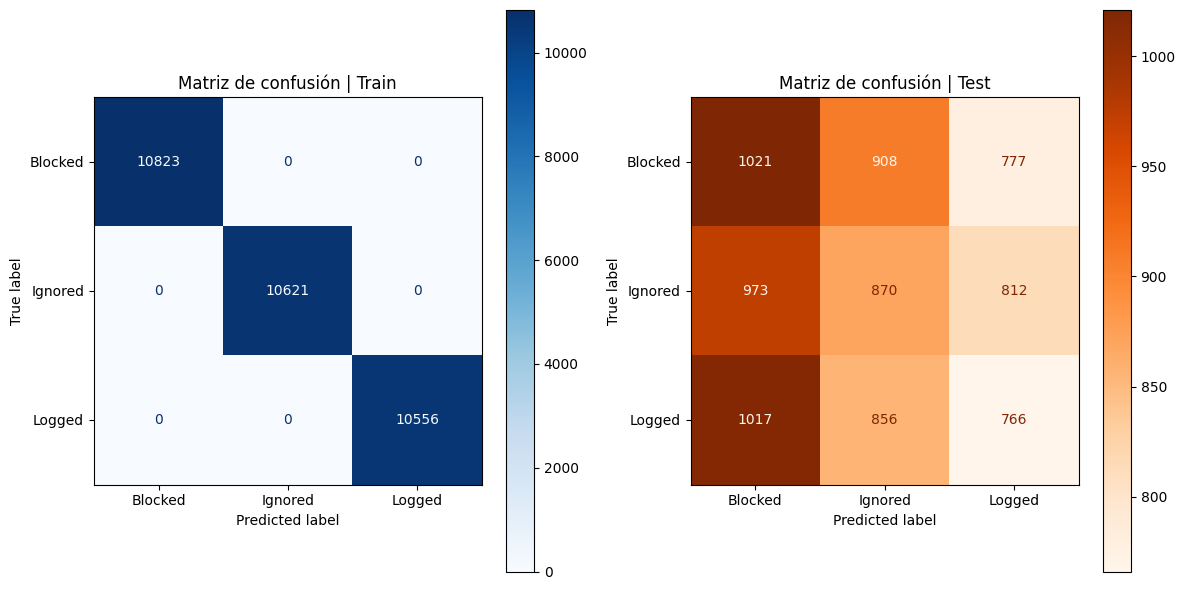

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10823
           1       1.00      1.00      1.00     10621
           2       1.00      1.00      1.00     10556

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000


test               precision    recall  f1-score   support

           0       0.34      0.38      0.36      2706
           1       0.33      0.33      0.33      2655
           2       0.33      0.29      0.31      2639

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

accuracy_score_train: 100.00%
accuracy_score_test: 33.21%


In [16]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(rf_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(rf_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_rf)
print("")
print("test", report_rf_test)
print(f"accuracy_score_train: {rf_acc*100:.2f}%")
print(f"accuracy_score_test: {rf_acc_test*100:.2f}%")

### LogisticRegression

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# calculamos el mejor íncide posible para el parámetro 'C'.
vectorC = np.logspace(-4,4,5)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(Xs_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
             scoring='accuracy')

In [18]:
# entrenamos el modelo.
lr = LogisticRegression(C=grid.best_params_['C'], max_iter=500, random_state=42).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
lr_y_pred = lr.predict(Xs_train)
report_lr = classification_report(y_train, lr_y_pred)
lr_acc = accuracy_score(y_train, lr_y_pred)
lr_confmat = confusion_matrix(y_train, lr_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
lr_y_pred_test = lr.predict(Xs_test)
report_rf_test = classification_report(y_test, lr_y_pred_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred_test)
lr_confmat_test = confusion_matrix(y_test, lr_y_pred_test)

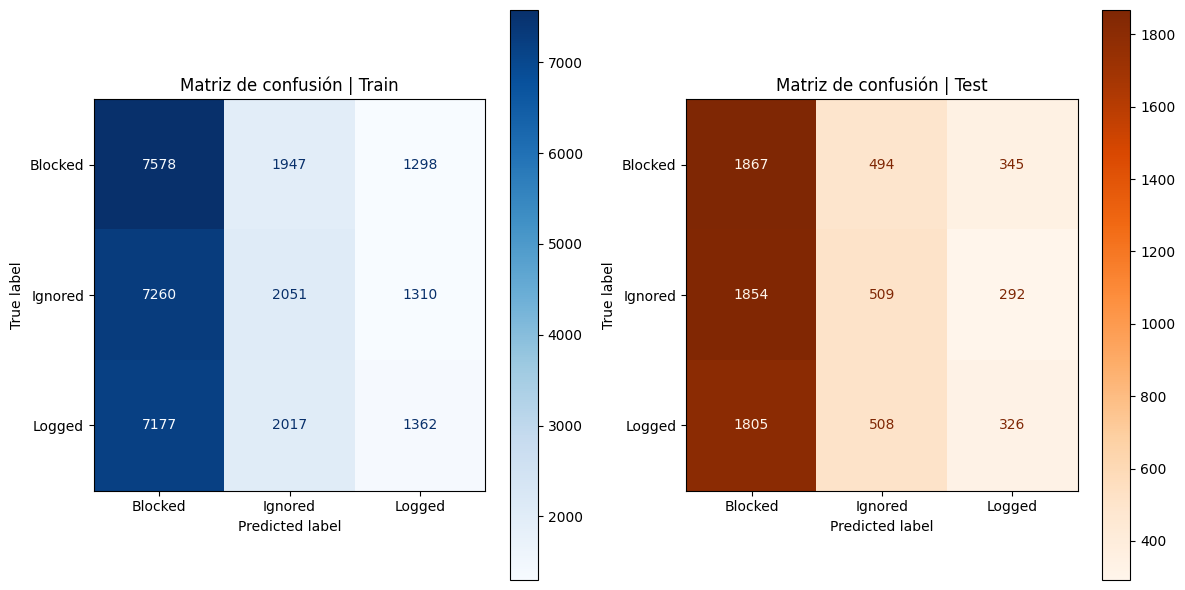

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.34      0.70      0.46     10823
           1       0.34      0.19      0.25     10621
           2       0.34      0.13      0.19     10556

    accuracy                           0.34     32000
   macro avg       0.34      0.34      0.30     32000
weighted avg       0.34      0.34      0.30     32000


test               precision    recall  f1-score   support

           0       0.34      0.69      0.45      2706
           1       0.34      0.19      0.24      2655
           2       0.34      0.12      0.18      2639

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.29      8000
weighted avg       0.34      0.34      0.29      8000

accuracy_score_train: 34.35%
accuracy_score_test: 33.77%


In [19]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(lr_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(lr_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_lr)
print("")
print("test", report_rf_test)
print(f"accuracy_score_train: {lr_acc*100:.2f}%")
print(f"accuracy_score_test: {lr_acc_test*100:.2f}%")

### KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# entrenamos el modelo.
knn = KNeighborsClassifier(n_neighbors=2).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
knn_y_pred = knn.predict(Xs_train)
report_knn = classification_report(y_train, knn_y_pred)
knn_acc = accuracy_score(y_train, knn_y_pred)
knn_confmat = confusion_matrix(y_train, knn_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
knn_y_pred_test = knn.predict(Xs_test)
report_knn_test = classification_report(y_test, knn_y_pred_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
knn_confmat_test = confusion_matrix(y_test, knn_y_pred_test)

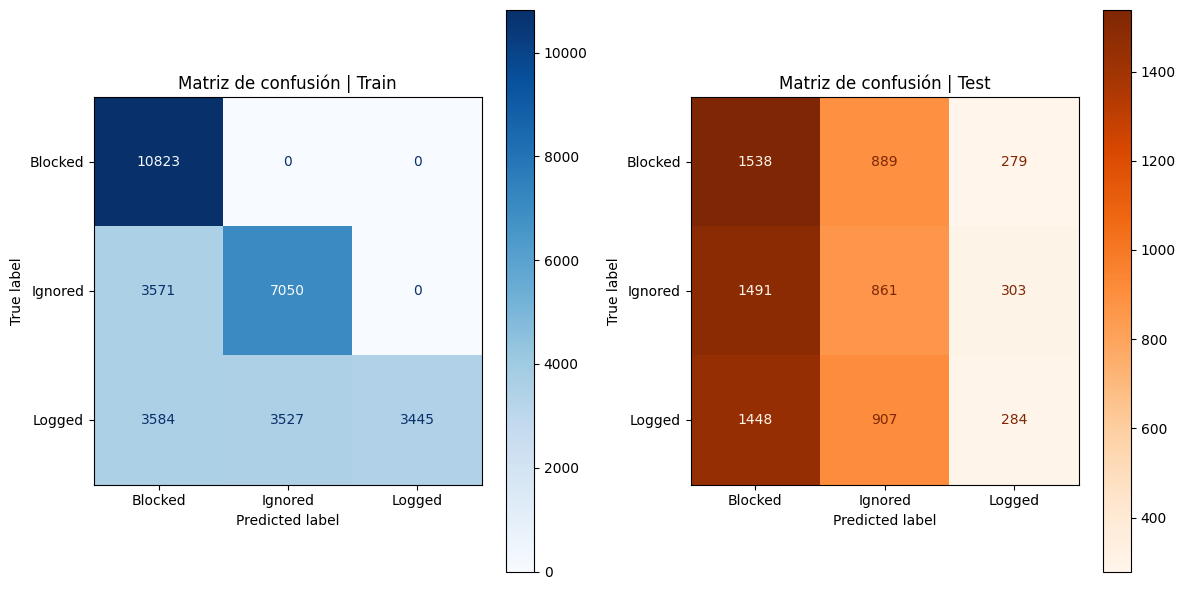

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.60      1.00      0.75     10823
           1       0.67      0.66      0.67     10621
           2       1.00      0.33      0.49     10556

    accuracy                           0.67     32000
   macro avg       0.76      0.66      0.64     32000
weighted avg       0.75      0.67      0.64     32000


test               precision    recall  f1-score   support

           0       0.34      0.57      0.43      2706
           1       0.32      0.32      0.32      2655
           2       0.33      0.11      0.16      2639

    accuracy                           0.34      8000
   macro avg       0.33      0.33      0.30      8000
weighted avg       0.33      0.34      0.31      8000

accuracy_score_train: 66.62%
accuracy_score_test: 33.54%


In [21]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(knn_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(knn_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_knn)
print("")
print("test", report_knn_test)
print(f"accuracy_score_train: {knn_acc*100:.2f}%")
print(f"accuracy_score_test: {knn_acc_test*100:.2f}%")

### DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# entrenamos el modelo.
dtc = DecisionTreeClassifier(random_state=42).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
dtc_y_pred = dtc.predict(Xs_train)                                        
report_dtc = classification_report(y_train, dtc_y_pred)
dtc_acc = accuracy_score(y_train, dtc_y_pred)
dtc_confmat = confusion_matrix(y_train, dtc_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
dtc_y_pred_test = dtc.predict(Xs_test)
report_dtc_test = classification_report(y_test, dtc_y_pred_test)
dtc_acc_test = accuracy_score(y_test, dtc_y_pred_test)
dtc_confmat_test = confusion_matrix(y_test, dtc_y_pred_test)

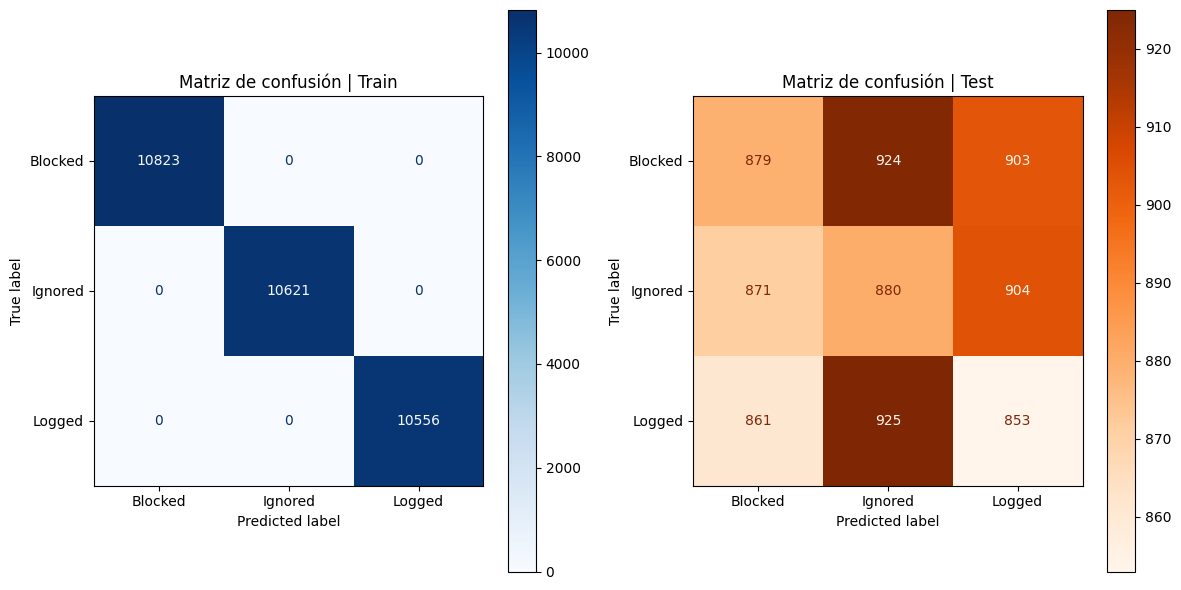

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10823
           1       1.00      1.00      1.00     10621
           2       1.00      1.00      1.00     10556

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000


test               precision    recall  f1-score   support

           0       0.34      0.32      0.33      2706
           1       0.32      0.33      0.33      2655
           2       0.32      0.32      0.32      2639

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

accuracy_score_train: 100.00%
accuracy_score_test: 32.65%


In [23]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(dtc_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(dtc_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_dtc)
print("")
print("test", report_dtc_test)
print(f"accuracy_score_train: {dtc_acc*100:.2f}%")
print(f"accuracy_score_test: {dtc_acc_test*100:.2f}%")